In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

''' train and test path '''
train_pah = "/kaggle/input/cactus-aerial-photos/training_set/training_set/"
test_path = "/kaggle/input/cactus-aerial-photos/validation_set/validation_set/"

''' initializing some variables '''
img_h = 128
img_w = 128
bs = 25

/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4502.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4848.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4665.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4475.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.5305.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4394.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4734.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4400.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.4953.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation_set/no_cactus/Sinplanta.5354.jpg
/kaggle/input/cactus-aerial-photos/validation_set/validation

In [2]:
''' reading images from train directory '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path, seed=123, image_size=(img_h, img_w), 
                                                               batch_size=bs)

Found 17500 files belonging to 2 classes.


In [3]:
''' classes names '''
c_names = train_ds.class_names
print(c_names)

['cactus', 'no_cactus']


In [4]:
''' reading images from test directory '''
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_path, seed=123, image_size=(img_h, img_w), 
                                                              batch_size=bs)

Found 4000 files belonging to 2 classes.


In [5]:
c_names = train_ds.class_names
print(c_names)
num_classes = len(c_names)

['cactus', 'no_cactus']


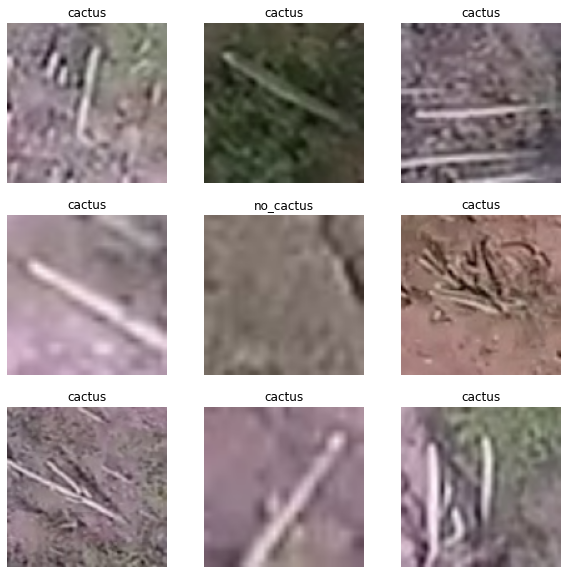

In [6]:
''' plotting some images '''

''' taaking one batch '''
for img, lbl in train_ds.take(1):
    ''' plotting 9 images '''
    for i in range(9):
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(c_names[lbl[i]])
        plt.axis("off")

In [7]:
''' Model '''
model = keras.Sequential([
    ''' Preprocessing Layer '''
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    
    ''' Convolutional Layers '''
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    
    """ Hidden Layers"""
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    
    ''' Classification Layer '''
    keras.layers.Dense(NUM_OF_CLASSES, activation="softmax"),
])

In [8]:
''' compile the model '''
model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
''' training '''
epochs = 7
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/7
700/700 [==============================] - 301s 429ms/step - loss: 0.2465 - accuracy: 0.8880 - val_loss: 0.1118 - val_accuracy: 0.9630
Epoch 2/7
700/700 [==============================] - 199s 284ms/step - loss: 0.1080 - accuracy: 0.9608 - val_loss: 0.2087 - val_accuracy: 0.9120
Epoch 3/7
700/700 [==============================] - 198s 283ms/step - loss: 0.0706 - accuracy: 0.9742 - val_loss: 0.0749 - val_accuracy: 0.9780
Epoch 4/7
700/700 [==============================] - 209s 298ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 5/7
700/700 [==============================] - 199s 284ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0079 - val_accuracy: 0.9973
Epoch 6/7
700/700 [==============================] - 200s 285ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 7/7
700/700 [==============================] - 214s 306ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0246 - val_ac

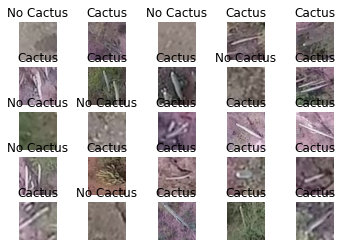

In [10]:
''' label_ function '''
def label_(input, i):
    max_val = int(np.argmax(input[i]))
    c_name = ["Cactus", "No Cactus"]
    return c_name[max_val]

for img, lbl in train_ds.take(1):
    ''' plotting some images '''
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        ''' prediction '''
        plt.label(label_(model.predict(img[:i+1]), i))
        plt.axis("off")